In [230]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Load the groceries data
with open('groceries.txt', 'r') as file:
    baskets = [line.strip().split(',') for line in file]

# Use TransactionEncoder to one-hot encode the baskets
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the one-hot encoded DataFrame
(df_encoded.head())


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#### Here we are one hot encoding the dataframe

In [228]:
from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets with a minimum support of 0.005
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)

# Display the frequent itemsets
(frequent_itemsets.sort_values(by='support',ascending=False).head(15))


,support,itemsets
117,0.255516,(whole milk)
73,0.193493,(other vegetables)
88,0.183935,(rolls/buns)
98,0.174377,(soda)
118,0.139502,(yogurt)
7,0.110524,(bottled water)
89,0.108998,(root vegetables)
110,0.104931,(tropical fruit)
96,0.098526,(shopping bags)
93,0.093950,(sausage)


#### Listing out itemsets with the highest support. This is just for our reference and understanding of the dataset

In [244]:
rules['con_supp_bins'] = pd.qcut(rules['consequent support'],10, duplicates = 'drop')
rules.groupby(['con_supp_bins']).agg({'consequent support':['min','max']})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27716\3315999086.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rules.groupby(['con_supp_bins']).agg({'consequent support':['min','max']})


consequent support          
                                min       max
con_supp_bins                                
(0.02, 0.0554]             0.021047  0.055414
(0.0554, 0.0717]           0.056024  0.071683
(0.0717, 0.0798]           0.072293  0.079817
(0.0798, 0.0985]           0.080529  0.098526
(0.0985, 0.109]            0.104931  0.108998
(0.109, 0.14]              0.110524  0.139502
(0.14, 0.184]              0.174377  0.183935
(0.184, 0.193]             0.193493  0.193493
(0.193, 0.256]             0.255516  0.255516

In [242]:
rules['lift_bins'] = pd.qcut(rules['lift'],10, duplicates = 'drop')
rules.groupby(['lift_bins']).agg({'lift':['min','max','count']})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27716\3100252230.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rules.groupby(['lift_bins']).agg({'lift':['min','max','count']})


lift                
                     min       max count
lift_bins                               
(0.445, 1.251]  0.445664  1.250891   176
(1.251, 1.442]  1.253822  1.442377   175
(1.442, 1.588]  1.443519  1.588147   175
(1.588, 1.746]  1.588261  1.745998   175
(1.746, 1.875]  1.746247  1.875041   175
(1.875, 2.074]  1.875752  2.074251   176
(2.074, 2.251]  2.075054  2.250988   174
(2.251, 2.517]  2.251824  2.517128   176
(2.517, 2.883]  2.517462  2.883073   174
(2.883, 5.212]  2.884091  5.212371   175

In [246]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with minimum confidence of 0.1
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Filter rules based on lift and confidence thresholds
high_lift_rules = rules[(rules['lift'] > 2.88) & (rules['consequent support'] < 0.05)]


#### As you can see we have binned the consequent support and lift values using qcut and then based on these values we understoond the distribution. We then used this data so set the lift and consequent support thresholds

In [161]:

# Filter to get only pairwise interactions
pairwise_rules = high_lift_rules[high_lift_rules['antecedents'].apply(lambda x: len(x) == 1) & high_lift_rules['consequents'].apply(lambda x: len(x) == 1)]

# Display the top 50 pairwise rules sorted by lift
top_50_pairwise_rules = pairwise_rules.sort_values(by='lift', ascending=False)
print("Top 50 Pairwise Rules:")
(top_50_pairwise_rules)

Top 50 Pairwise Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
431,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407,0.805441
432,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758,0.818949
37,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428,0.793507
452,(napkins),(hygiene articles),0.052364,0.032944,0.006101,0.116505,3.536498,0.004376,1.094580,0.756867
188,(chicken),(frozen vegetables),0.042908,0.048094,0.006711,0.156398,3.251956,0.004647,1.128383,0.723538
189,(frozen vegetables),(chicken),0.048094,0.042908,0.006711,0.139535,3.251956,0.004647,1.112296,0.727480
217,(chocolate),(waffles),0.049619,0.038434,0.005796,0.116803,3.039048,0.003889,1.088733,0.705979
218,(waffles),(chocolate),0.038434,0.049619,0.005796,0.150794,3.039048,0.003889,1.119141,0.697768


### Here we have conditioned on higher lift and lower consequent support - i.e., we are looking at items which are otherwise not picked frequently, but the odds of them being picked increase significantly if one picks the antecedent item
### We can observe that odds of picking white bread increase significantly if one picks up ham <br>
### Other such combinations are, odds of picking frozen veggies if one has picked chicken; and waffles and choclates

In [163]:

# Filter rules based on lift and confidence thresholds
high_lift_rules = rules[(rules['lift'] < 1) & (rules['consequent support'] > 0.25)]

# Filter to get only pairwise interactions
pairwise_rules = high_lift_rules[high_lift_rules['antecedents'].apply(lambda x: len(x) == 1) & high_lift_rules['consequents'].apply(lambda x: len(x) == 1)]

# Display the top 50 pairwise rules sorted by lift
top_50_pairwise_rules = pairwise_rules.sort_values(by='lift', ascending=True)
print("Top 50 Pairwise Rules:")
(top_50_pairwise_rules)

Top 50 Pairwise Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
179,(canned beer),(whole milk),0.077682,0.255516,0.008846,0.113874,0.445664,-0.011003,0.840156,-0.574215
724,(soda),(whole milk),0.174377,0.255516,0.040061,0.229738,0.899112,-0.004495,0.966533,-0.119646
463,(ice cream),(whole milk),0.025013,0.255516,0.005897,0.235772,0.922730,-0.000494,0.974165,-0.079095
729,(specialty bar),(whole milk),0.027351,0.255516,0.006507,0.237918,0.931128,-0.000481,0.976908,-0.070671
185,(chewing gum),(whole milk),0.021047,0.255516,0.005084,0.241546,0.945326,-0.000294,0.981581,-0.055784
503,(misc. beverages),(whole milk),0.028368,0.255516,0.007016,0.247312,0.967892,-0.000233,0.989100,-0.033015
708,(shopping bags),(whole milk),0.098526,0.255516,0.024504,0.248710,0.973364,-0.000671,0.990941,-0.029462
53,(bottled beer),(whole milk),0.080529,0.255516,0.020437,0.253788,0.993237,-0.000139,0.997684,-0.007351


### Here we have conditioned on less than one lift and higher consequent support - i.e., we are looking at items which do not go well with one another
### Odds of picking whole milk are high independently but they reduce significantly if one picks up things like - beer, soda, gum etc


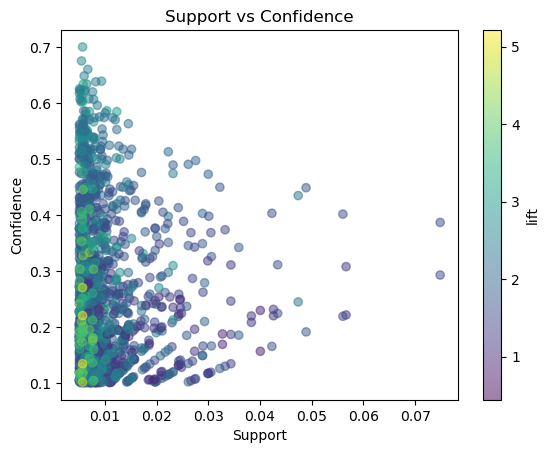

In [181]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Scatter plot of the rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.5,  c=rules['lift'], cmap='viridis')
plt.colorbar(label='lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


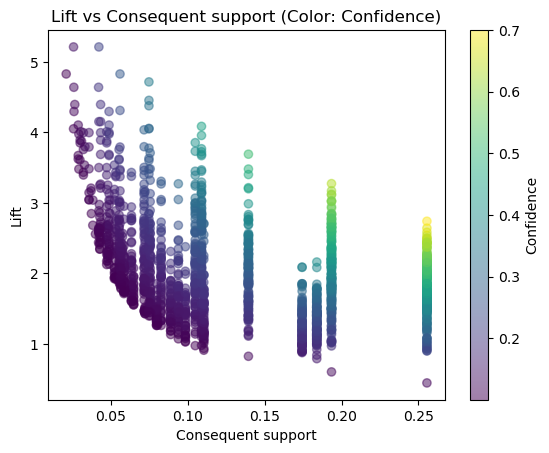

In [185]:

# Two-key plot using support and lift
plt.scatter(rules['consequent support'], rules['lift'], alpha=0.5, c=rules['confidence'], cmap='viridis')
plt.colorbar(label='Confidence')
plt.xlabel('Consequent support')
plt.ylabel('Lift')
plt.title('Lift vs Consequent support (Color: Confidence)')
plt.show()


### Looking at the previous two charts, it appears that items with low or consequent support tend to have higher lift, some examples are - ham, waffles, sanitary items etc

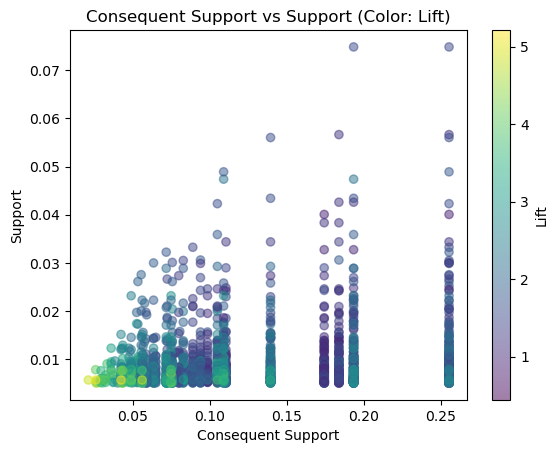

In [192]:

# Plot using support, confidence, and lift
plt.scatter(rules['consequent support'], rules['support'], alpha=0.5, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Consequent Support')
plt.ylabel('Support')
plt.title('Consequent Support vs Support (Color: Lift)')
plt.show()


### The lower right segment of the chart, are the items with high consequent support but low overall support - these are things like milk + beer - milk has high chances of being bought independently but if one has beer in their cart the odds of picking milk reduce significantly

#### You can ignore the code below. The code is to write the graph to a .gexf file for Gephi

In [208]:
import networkx as nx

# Assuming 'high_lift_rules' is already generated from the previous steps

# Filter rules with lift > 4
filtered_rules = high_lift_rules[high_lift_rules['lift'] > 1.87]

# Create a directed graph from the filtered rules
G = nx.DiGraph()

for _, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'], confidence=row['confidence'])

# Write the graph to a .gexf file for Gephi
nx.write_gexf(G, 'playlists2.gexf')

print("Graph has been written to 'playlists2.gexf'")


Graph has been written to 'playlists2.gexf'


In [222]:
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()
filtered_rules = rules[rules['lift']>1.87]

pairwise_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: len(x) == 1) & filtered_rules['consequents'].apply(lambda x: len(x) == 1)]

# Iterate through each rule in the filtered DataFrame
for _, rule in pairwise_rules.iterrows():
    antecedents = tuple(rule['antecedents'])
    consequents = tuple(rule['consequents'])

    # If antecedents and consequents are not empty, add the edge
    if antecedents and consequents:
        # Add an edge with attributes for confidence, lift, and support
        G.add_edge(antecedents, consequents, confidence=rule['confidence'], lift=rule['lift'], support=rule['support'])

# Display the graph information
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Save the graph to a GraphML file
nx.write_graphml(G, 'filtered_rules3.graphml')

print("Graph has been written to 'filtered_rules.graphml'")


Graph created with 47 nodes and 183 edges.
Graph has been written to 'filtered_rules.graphml'


In [216]:
rules[rules['lift']>1.87]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lift_bins
0,(UHT-milk),(bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,0.003624,1.138668,0.512099,"(1.875, 2.074]"
5,(baking powder),(other vegetables),0.017692,0.193493,0.007321,0.413793,2.138547,0.003898,1.375807,0.541982,"(2.074, 2.251]"
6,(baking powder),(whole milk),0.017692,0.255516,0.009253,0.522989,2.046793,0.004732,1.560725,0.520642,"(1.875, 2.074]"
8,(beef),(butter),0.052466,0.055414,0.005796,0.110465,1.993439,0.002888,1.061887,0.525949,"(1.875, 2.074]"
9,(butter),(beef),0.055414,0.052466,0.005796,0.104587,1.993439,0.002888,1.058209,0.527591,"(1.875, 2.074]"
...,...,...,...,...,...,...,...,...,...,...,...
1746,"(root vegetables, tropical fruit)","(whole milk, yogurt)",0.021047,0.056024,0.005694,0.270531,4.828814,0.004515,1.294059,0.809957,"(2.883, 5.212]"
1747,"(root vegetables, whole milk)","(yogurt, tropical fruit)",0.048907,0.029283,0.005694,0.116424,3.975803,0.004262,1.098623,0.786967,"(2.883, 5.212]"
1748,"(yogurt, tropical fruit)","(root vegetables, whole milk)",0.029283,0.048907,0.005694,0.194444,3.975803,0.004262,1.180667,0.771057,"(2.883, 5.212]"
1749,"(whole milk, yogurt)","(root vegetables, tropical fruit)",0.056024,0.021047,0.005694,0.101633,4.828814,0.004515,1.089703,0.839969,"(2.883, 5.212]"
